In [139]:
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
from sklearn.preprocessing import StandardScaler
import numpy as np
from IPython.display import IFrame as show
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='xpeigang', api_key='lwQSZWto6kkYyDeNh8SM')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings('ignore')

In [140]:
master_df = pd.read_csv("datasets/master_final_merged_df_protein_gdp.csv")

In [141]:
init_notebook_mode(connected=True)

### Analysis 1: PCA on different food sources

In [142]:
col_list = master_df.columns.tolist()
protein_col_list = col_list[4:19]
# Cereals is the total of others. No need to include it here 
protein_col_list.remove("Cereals")
protein_col_list_country = ["Country"]+protein_col_list

protein_group_df = master_df[protein_col_list_country]

# If Protein food group is empty. it is droped. 
df1 = protein_group_df[protein_group_df.isna().any(axis=1)]
# print ("Dropped Countries:{}".format(df1["Country"]))
protein_group_df.dropna(inplace = True)

protein_group_scaled = StandardScaler().fit_transform(protein_group_df[protein_col_list])

PCA

In [143]:
principalComponents = pca.fit_transform(protein_group_scaled)

pc_protein_1,pc_protein_2 = zip(*principalComponents)
protein_group_df["principal component 1"] = pc_protein_1
protein_group_df["principal component 2"] = pc_protein_2


X = protein_group_df[["principal component 1","principal component 2"]].values
protein_group_df.head()

,Country,Milk,Bovine meat,Sheep and goat meat,Pigmeat,Poultry,Eggs,Fish,Maize,Rice,Wheat,Rye,Barley,Pulses,Starchy roots,principal component 1,principal component 2
0,Afghanistan,6.02,2.01,2.02,0.00,0.79,0.32,0.02,0.57,2.89,37.12,0.00,0.72,1.56,0.22,-0.518736,-1.454621
1,Albania,29.67,9.18,5.35,2.76,4.91,3.24,1.50,0.36,1.22,33.71,0.13,0.03,3.06,1.86,2.440719,-2.200208
2,Algeria,13.78,2.18,2.70,0.00,2.30,2.09,1.23,3.09,0.50,43.03,0.00,2.61,4.55,2.67,0.596646,-2.699386
3,Angola,1.02,3.27,0.44,2.34,5.55,0.51,4.14,8.80,1.55,8.46,0.00,0.00,5.23,7.13,-1.686584,-0.548387
4,Antigua and Barbuda,12.22,5.39,0.60,3.26,18.59,1.30,13.11,0.39,2.15,13.39,0.00,0.00,1.66,0.86,0.845285,1.230920


#### Continent Level

###### Countries to Continent 

In [144]:
# Code adapated from https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry

from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2,country_name_to_country_alpha3,country_alpha3_to_country_alpha2

continents_dict = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Eurpoe'
}
countries = protein_group_df['Country'].tolist()

def convert_continents(countries):
    """
    This function tries to get the continent based on Country name.
    Since some countries names are differnt in the library we are using here,
    need to manually change those.
    
    This function also tries to rechieve an alpha 3 Country Code based on the name. 
    """
    continents = []
    country_codes = []
    for country in countries:
        try:
            country_code = country_name_to_country_alpha3(country)
            continent = continents_dict[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))]
            continents.append(continent)
            country_codes.append(country_code)
        except KeyError:
            print(country)
            continents.append(country)
            country_codes.append(country)
    return continents,country_codes


continents,country_codes = convert_continents(countries)

Bolivia (Plurinational State of)
China, Hong Kong SAR
China, Macao SAR
China, mainland
China, Taiwan Province of
Congo (note no data in Food suppley tables for DRC)
CÃƒÂ´te d'Ivoire
Iran (Islamic Republic of)
Republic of Korea
Eswatini
North Macedonia
Timor-Leste
Venezuela (Bolivarian Republic of)


In [145]:
# Make a new column called Continent using the continents information we just get. 
protein_group_df["Continent"] = continents

# A manually constructed country to contienent and country to country code list for those which have variation in names. 
manual_continent_dict = {"Bolivia (Plurinational State of)":"South America"
                         ,"China, Hong Kong SAR":"Asia"
                         ,"China, mainland":"Asia"
                         ,"China, Macao SAR":"Asia"
                         ,"China, Taiwan Province of":"Asia"
                         ,"Congo (note no data in Food suppley tables for DRC)":"Africa"
                         ,"CÃƒÂ´te d'Ivoire":"Africa"
                         ,"Cote d'Ivoire":"Africa"
                        ,"Iran (Islamic Republic of)":"Asia"
                         ,"Sudan (former)":"Africa"
                        ,"Republic of Korea":"Asia"
                        ,"Eswatini":"Africa"
                        ,"North Macedonia":"Europe"
                        ,"Timor-Leste":"Asia"
                        ,"Venezuela (Bolivarian Republic of)":"South America"}

manual_country_code_dict = {"Bolivia (Plurinational State of)":"BOL"
                         ,"China, Hong Kong SAR":"HKG"
                         ,"China, mainland":"CHN"
                         ,"China, Macao SAR":"MAC"
                         ,"China, Taiwan Province of":"TWN"
                         ,"Congo (note no data in Food suppley tables for DRC)":"COG"
                         ,"CÃƒÂ´te d'Ivoire":"CIV"
                            ,"Cote d'Ivoire":"CIV"
                        ,"Iran (Islamic Republic of)":"IRN"
                        ,"Republic of Korea":"KOR"
                        ,"Eswatini":"SWZ"
                        ,"Sudan (former)":"SDN"
                        ,"North Macedonia":"MKD"
                        ,"Republic of North Macedonia":"MKD"
                        ,"Timor-Leste":"TLS"
                        ,"Venezuela (Bolivarian Republic of)":"VEN"}

# Replace missing ones with correct continents. 
protein_group_df[protein_group_df["Country"].isna()]
# principalDf.to_csv("test.csv")
protein_group_df["Continent"] = protein_group_df["Continent"].replace(manual_continent_dict)


In [146]:
# Code adapted from https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb
import matplotlib.pyplot as plt

def pca_plot(colors,df,cluster_name):
    """
    This function makes a plot using matplotlib, which uses Principal Component 1 as x and 2 as y.
    Colors represent clusters. 
    In this case, cluster can be Continent, Region, and Income group.  
    """
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 10)
    ax.set_ylabel('Principal Component 2', fontsize = 10)
    ax.set_title('2 component PCA {}'.format(cluster_name), fontsize = 20)

    
    cluster_list = df[cluster_name].unique()
    for cluster,color in zip(cluster_list,colors):
        indicesToKeep = df[cluster_name] == cluster
        ax.scatter(df.loc[indicesToKeep, 'principal component 1']
               , df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
#     ax = annotate_text(df,ax)
    ax.legend(cluster_list)
    ax.grid()

In [147]:
def annotate_text(df,ax):
    for i,row in df.iterrows():
        ax.annotate(row["Country"],(row['principal component 1'],row['principal component 2']))
    return ax

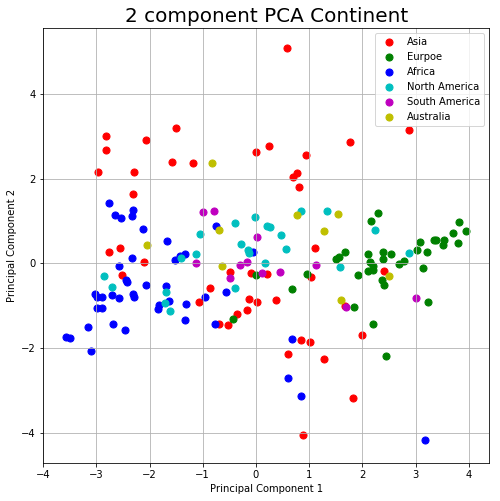

In [148]:
colors = ['r', 'g', 'b','c','m','y']
pca_plot(colors,protein_group_df,"Continent")

###### K means on Top of PCA (Unable to fix the legend here. Shape represents continent, and colors represent cluster)

In [149]:
#K means Clustering 
# Code adapted from https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb
from sklearn.cluster import KMeans

def perform_kmeans(X, n_clust):
    """
    This function handles K means clustering. 
    """
    model = KMeans(n_clust)
    model.fit(X)
    cluster_labels = model.predict(X)
    cent = model.cluster_centers_
    return (cluster_labels, cent)

def pca_kmeans_plot(colors, mark_shapes,df,cluster_name,centers):
    """
    This function makes a plot using matplotlib, which uses Principal Component 1 as x and 2 as y.
    Shapes represent clusters. 
    In this case, cluster can be Continent, Region, and Income group.  
    Colors represent the clusters kmeans assigns the point to. 
    """
    fig_k = plt.figure(figsize = (8,8))
    ax = fig_k.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 10)
    ax.set_ylabel('Principal Component 2', fontsize = 10)
    ax.set_title('2 component PCA Kmeans Clustering {}'.format(cluster_name), fontsize = 20)

    cluster_list = df[cluster_name].unique()

    for cluster, ms in zip(cluster_list,mark_shapes):
        for kmeans_cluster,color in zip([i for i in range(len(colors))],colors):
            indicesToKeep = (df[cluster_name] == cluster) & (df["{}_Cluster".format(cluster_name)] == kmeans_cluster)
            ax.scatter(df.loc[indicesToKeep, 'principal component 1']
                   , df.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , marker = ms
                   , s = 50)

    ax.legend(mark_shapes,cluster_list)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    ax.grid()

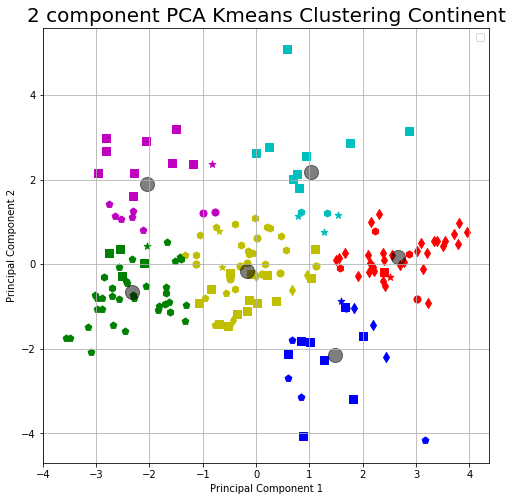

In [150]:

# Plot Contienent level 
X = protein_group_df[["principal component 1","principal component 2"]].values
continent_cluster_labels, continent_centers = perform_kmeans(X, 6)
protein_group_df["Continent_Cluster"] = continent_cluster_labels
mark_shapes = ['s','d','p','h','o','*']
colors = ['r', 'g', 'b','c','m','y']
pca_kmeans_plot(colors,mark_shapes,protein_group_df,"Continent",continent_centers)

In [151]:


def plot_plotly(df,cluster_name,centers,cluster_num,filename_prefix,additional):
    """
    This function draws plots using plotly. 
    It draws different traces with different shape and color based on the cluster and kmeans cluster it belongs to.abs
    In this case, cluster can be Continent, Region, and Income group. 
    
    Shape represents it's original cluster, and color represents the cluster K means assigns it to. 
    """
    data = []
    rainbow_colorscale =  [
    'rgb(150,0,90)','rgb(0,0,200)',
     'rgb(10,152,255)',
    'rgb(44,255,150)', 'rgb(151,255,0)',
    'rgb(255,234,0)','rgb(255,111,0)',
    'rgb(255,0,0)'
    ]
    if additional:
        kmeans_cluster_name = additional
    else:
        kmeans_cluster_name = "{}_Cluster".format(cluster_name)
        
    
    cluster_list = df[cluster_name].unique()
    for ms,cluster in enumerate(cluster_list):
        for kmeans_cluster in range(cluster_num):
            indicesToKeep = (df[cluster_name] == cluster) & (df[kmeans_cluster_name] == kmeans_cluster)
            trace0 = go.Scatter(
                x = df.loc[indicesToKeep, 'principal component 1'],
                y = df.loc[indicesToKeep, 'principal component 2'],
                name = str(cluster) + str(kmeans_cluster),
                mode = 'markers',
                marker = dict(
                    size = 9, 
                    color = rainbow_colorscale[kmeans_cluster],
                    line = dict(width = 1),
                    symbol = ms,
                ),
                text = df.loc[indicesToKeep,"Country"],
            )
            data.append(trace0);
    method = ""
    if centers != "no center":
        trace1 = go.Scatter(
            x = centers[:, 0],
            y = centers[:, 1],
            name = "Center",
            mode = 'markers',
            marker = dict(
                size = 20, 
                color = 'rgba(220, 220, 220, .4)', 
                line = dict(width = 1),
                ),
                )
        data.append(trace1)
        method = "K means"
    else:
        method = "Spectral"
    file_plot_title = 'PCA calculated with {} Data {} Clustering {} with {} clusters'.format(filename_prefix, method,cluster_name,cluster_num)
    layout= go.Layout(
        title= file_plot_title,
        hovermode= 'closest',
        xaxis= dict(
            title= 'principal component 1',
            ticklen= 5,
            zeroline= False,
            gridwidth= 2,
        ),
        yaxis=dict(
            title= 'principal component 2',
            ticklen= 5,
            gridwidth= 2,
        ),
        showlegend= True
        )

    fig = dict(data=data, layout=layout)
    iplot(fig)
    py.iplot(fig, filename=file_plot_title)

In [152]:
# Calling plotly function 
plot_plotly(protein_group_df,"Continent",continent_centers,6,"Protein Foods",'')

#### Region Level

###### Add Region and Development Level

In [153]:
# Read in UN's country classification dataset. 
region_df = pd.read_excel("datasets/CLASS.xls",skiprows = 4)
region_df = region_df.drop(["Lending category","Other","Economy","x","x.1","X","Income group"], axis = 1)
region_df.head()

,Code,Region
0,x,x
1,AFG,South Asia
2,ALB,Europe & Central Asia
3,DZA,Middle East & North Africa
4,ASM,East Asia & Pacific


In [154]:
# To be consistent, we will be using the historical data for Income group. And The year is 2012
# I emited few rows for easier analysis. Full dataset please check below. 
# Data source: https://datahelpdesk.worldbank.org/knowledgebase/articles/906519 

# Income range: <= 995, 996-3,945, 3,946-12,195, > 12,195 for low lower middle, upper middle, and high

income_df = pd.read_excel("datasets/class_2012.xlsx")

# Map this to acutal phrase
income_dict = {
    "L":"Low income",
    "LM":"Lower middle income",
    "UM":"Upper middle income",
    "H":"High income"    
}

income_df[2012] = income_df[2012].map(income_dict)
income_df = income_df.reset_index(level=0)
income_df = income_df.rename({2012:"Income group","index":"Code"}, axis = 1)
income_df.head()

,Code,Income group
0,AFG,Low income
1,ALB,Upper middle income
2,DZA,Upper middle income
3,ASM,Upper middle income
4,AND,High income


In [155]:
# Merge the two dataframes together. 
class_df = income_df.merge(region_df,how="inner", on="Code")
class_df.head()

,Code,Income group,Region
0,AFG,Low income,South Asia
1,ALB,Upper middle income,Europe & Central Asia
2,DZA,Upper middle income,Middle East & North Africa
3,ASM,Upper middle income,East Asia & Pacific
4,AND,High income,Europe & Central Asia


In [156]:
# Convert to Country Code Alpha 3 for easier merging 
protein_group_df["Code"] = country_codes
protein_group_df["Code"].replace(manual_country_code_dict, inplace = True)
protein_group_df.head()

,Country,Milk,Bovine meat,Sheep and goat meat,Pigmeat,Poultry,Eggs,Fish,Maize,Rice,Wheat,Rye,Barley,Pulses,Starchy roots,principal component 1,principal component 2,Continent,Continent_Cluster,Code
0,Afghanistan,6.02,2.01,2.02,0.00,0.79,0.32,0.02,0.57,2.89,37.12,0.00,0.72,1.56,0.22,-0.518736,-1.454621,Asia,5,AFG
1,Albania,29.67,9.18,5.35,2.76,4.91,3.24,1.50,0.36,1.22,33.71,0.13,0.03,3.06,1.86,2.440719,-2.200208,Eurpoe,2,ALB
2,Algeria,13.78,2.18,2.70,0.00,2.30,2.09,1.23,3.09,0.50,43.03,0.00,2.61,4.55,2.67,0.596646,-2.699386,Africa,2,DZA
3,Angola,1.02,3.27,0.44,2.34,5.55,0.51,4.14,8.80,1.55,8.46,0.00,0.00,5.23,7.13,-1.686584,-0.548387,Africa,1,AGO
4,Antigua and Barbuda,12.22,5.39,0.60,3.26,18.59,1.30,13.11,0.39,2.15,13.39,0.00,0.00,1.66,0.86,0.845285,1.230920,North America,3,ATG


In [157]:
# Intermediate dataset combined using Country Code, which gives us information on country classification. 
protein_group_merged_df = protein_group_df.merge(class_df,how= "left", on="Code")
protein_group_merged_df.head()

,Country,Milk,Bovine meat,Sheep and goat meat,Pigmeat,Poultry,Eggs,Fish,Maize,Rice,...,Barley,Pulses,Starchy roots,principal component 1,principal component 2,Continent,Continent_Cluster,Code,Income group,Region
0,Afghanistan,6.02,2.01,2.02,0.00,0.79,0.32,0.02,0.57,2.89,...,0.72,1.56,0.22,-0.518736,-1.454621,Asia,5,AFG,Low income,South Asia
1,Albania,29.67,9.18,5.35,2.76,4.91,3.24,1.50,0.36,1.22,...,0.03,3.06,1.86,2.440719,-2.200208,Eurpoe,2,ALB,Upper middle income,Europe & Central Asia
2,Algeria,13.78,2.18,2.70,0.00,2.30,2.09,1.23,3.09,0.50,...,2.61,4.55,2.67,0.596646,-2.699386,Africa,2,DZA,Upper middle income,Middle East & North Africa
3,Angola,1.02,3.27,0.44,2.34,5.55,0.51,4.14,8.80,1.55,...,0.00,5.23,7.13,-1.686584,-0.548387,Africa,1,AGO,Upper middle income,Sub-Saharan Africa
4,Antigua and Barbuda,12.22,5.39,0.60,3.26,18.59,1.30,13.11,0.39,2.15,...,0.00,1.66,0.86,0.845285,1.230920,North America,3,ATG,High income,Latin America & Caribbean


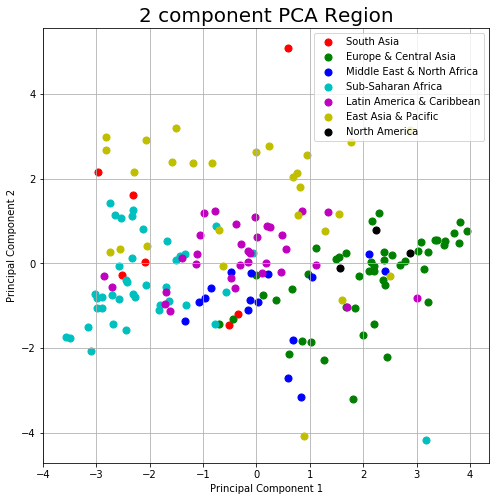

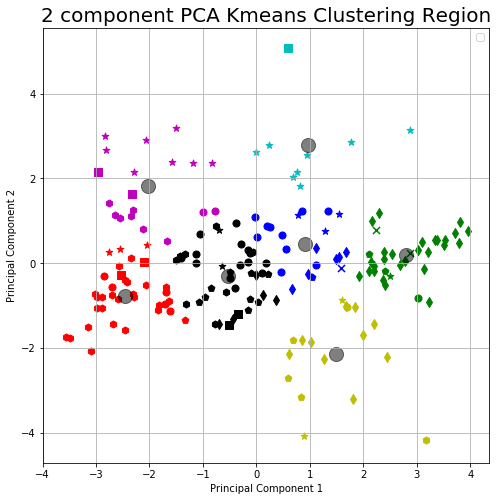

In [158]:
# Plot using matlablib on Region level.
colors_region = ['r', 'g', 'b','c','m','y','k']
pca_plot(colors_region,protein_group_merged_df,"Region")

region_cluster_labels, region_centers = perform_kmeans(X, 7)
protein_group_merged_df["Region_Cluster"] = region_cluster_labels
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,protein_group_merged_df,"Region",region_centers)

In [159]:
# Plot using plotly on Region level.

plot_plotly(protein_group_merged_df,"Region",region_centers,7,"Protein Foods",'')

#### Income Level

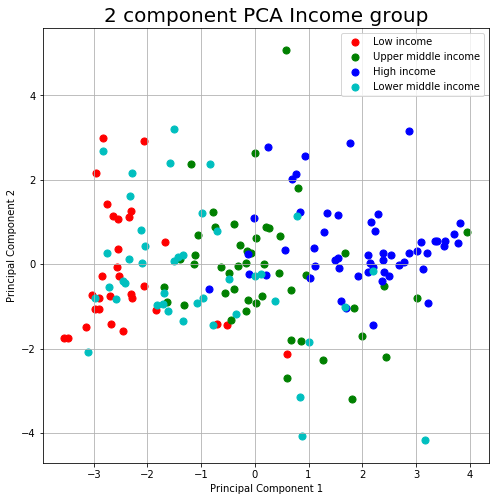

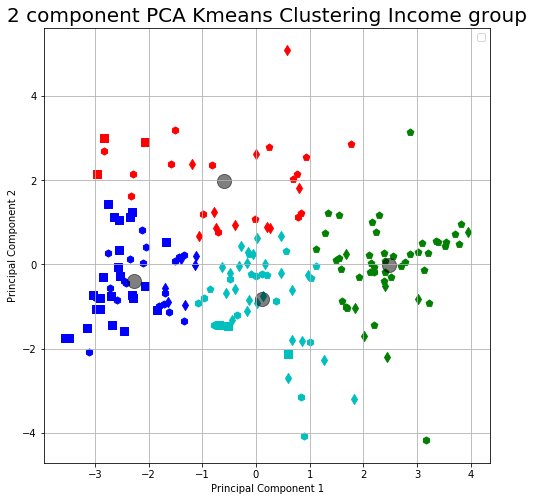

In [160]:
# Plot using matlablib on Income level.

colors_income = ['r', 'g', 'b','c']
pca_plot(colors_income,protein_group_merged_df,"Income group")
mark_shapes_income = ['s','d','p','h']
income_cluster_labels, income_centers = perform_kmeans(X, 4)
protein_group_merged_df["Income group_Cluster"] = income_cluster_labels


pca_kmeans_plot(colors_income,mark_shapes_income,protein_group_merged_df,"Income group",income_centers)

# Output to csv 
protein_group_merged_df.to_csv("datasets/results/pca_protein.csv")

In [161]:

# Plotly on Income level
plot_plotly(protein_group_merged_df,"Income group",income_centers,4,"Protein Foods",'')

### Analysis 2: PCA on protein foods + GDP + Urban/Rural ratio + permanent crops ratio 

###### Prepare Dataset
###### For this analysis, we groub bovine meat sheep goat pigmeat and poultry as a food group. Same for milk and egg.We then calculate a urban rural ration by dividing urban population with rural population. Last, we calculate a permanent crops ratio by dividing permanent crop area by total country area. 

###### This results in a dataset with Bovine_Sheep_Pigmeat_Poultry, Cereals, Milk_Egg, Fish_x, Av 2011+2012+2013 extracted from WDI (constant 2010 Us dollars)Urban_Rural_ratio  Permenent_Crops_Ratio, Country, Code, Income group, Region, and Continent as columns. 


In [162]:


protein_group_merged_df['Bovine_Sheep_Pigmeat_Poultry'] = protein_group_merged_df['Bovine meat']+protein_group_merged_df['Sheep and goat meat']+protein_group_merged_df['Pigmeat']+protein_group_merged_df['Poultry']
protein_group_merged_df['Milk_Egg'] = protein_group_merged_df['Milk']+protein_group_merged_df['Eggs']
protein_group_merged_master_df = protein_group_merged_df.merge(master_df,how="left",on="Country")
protein_group_merged_master_df['Urban_Rural_ratio'] = protein_group_merged_master_df["Urban population"]/protein_group_merged_master_df["Rural population"]
protein_group_merged_master_df['Permenent_Crops_Ratio'] = protein_group_merged_master_df['Permanent crops area']/ protein_group_merged_master_df['Total area of the country (excl. coastal waters)']
# protein_group_merged_final_master_df = protein_group_merged_master_df.merge(principalDf,how="left",on ="Country")
socio_cols = ['Bovine_Sheep_Pigmeat_Poultry','Cereals','Milk_Egg','Fish_x'
              ,' Av 2011+2012+2013 extracted from WDI (constant 2010 US$)'
              ,'Urban_Rural_ratio','Permenent_Crops_Ratio']

country_cols = ['Country','Code','Income group','Region','Continent']

desired_cols = socio_cols + country_cols

socio_pca_df = protein_group_merged_master_df[desired_cols]
socio_pca_df.head()

,Bovine_Sheep_Pigmeat_Poultry,Cereals,Milk_Egg,Fish_x,Av 2011+2012+2013 extracted from WDI (constant 2010 US$),Urban_Rural_ratio,Permenent_Crops_Ratio,Country,Code,Income group,Region,Continent
0,4.82,41.39,6.34,0.02,572.815028,0.328817,0.001838,Afghanistan,AFG,Low income,South Asia,Asia
1,22.20,35.48,32.91,1.50,4271.534293,1.429285,0.026748,Albania,ALB,Upper middle income,Europe & Central Asia,Eurpoe
2,7.18,49.25,15.87,1.23,4555.191581,2.395336,0.003880,Algeria,DZA,Upper middle income,Middle East & North Africa,Africa
3,11.60,19.00,1.53,4.14,3709.969541,0.528939,0.002326,Angola,AGO,Upper middle income,Sub-Saharan Africa,Africa
4,27.84,16.60,13.52,13.11,11929.279270,0.300981,0.022727,Antigua and Barbuda,ATG,High income,Latin America & Caribbean,North America


In [163]:
# Missing Values 
print("Countries with missing values {}".format(socio_pca_df[pd.isnull(socio_pca_df).any(axis=1)]["Country"].tolist()))

Countries with missing values ['Bermuda', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, Taiwan Province of', "Democratic People's Republic of Korea", 'Djibouti', 'French Polynesia', 'New Caledonia', 'Republic of Moldova', 'North Macedonia']


In [164]:
# Since missing values cannot be processing using pca, we will simply drop them.

socio_pca_dropped_df = socio_pca_df.dropna()

socio_scaled = StandardScaler().fit_transform(socio_pca_dropped_df[socio_cols])


###### PCA

In [165]:
principalComponents_socio = pca.fit_transform(socio_scaled)

# principalDf_socio = pd.DataFrame(data = principalComponents_socio
#              , columns = ['principal component 1', 'principal component 2'])
pc_socio_1,pc_socio_2 = zip(*principalComponents_socio)
socio_pca_dropped_df["principal component 1"] = pc_socio_1
socio_pca_dropped_df["principal component 2"] = pc_socio_2

socio_pca_dropped_df = socio_pca_dropped_df.rename({"Income group_y":"Income group","Region_y":"Region","Continent_x":"Continent"}, axis = 1)
X_socio = socio_pca_dropped_df[["principal component 1","principal component 2"]].values

#### Continent Level

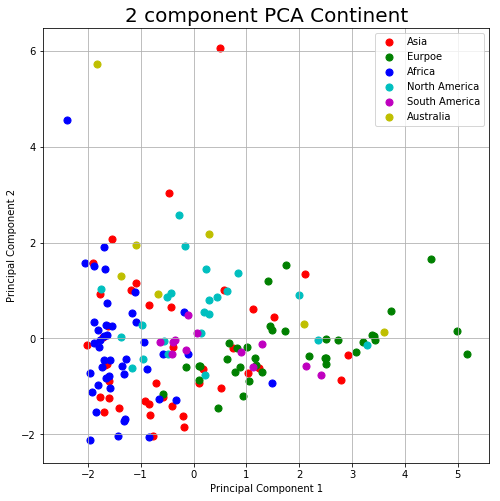

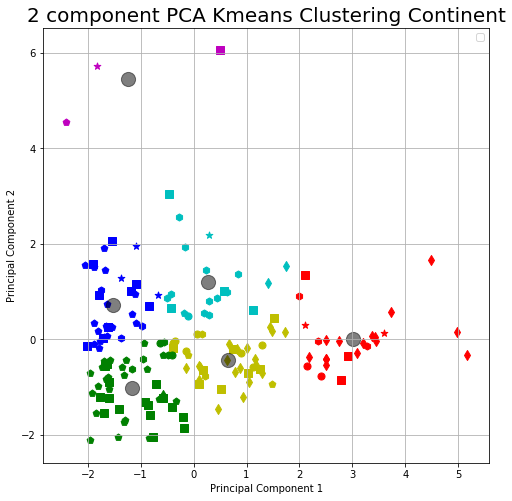

In [166]:
colors_region = ['r', 'g', 'b','c','m','y']
pca_plot(colors_region,socio_pca_dropped_df,"Continent")

continent_cluster_labels_socio, continent_centers_socio = perform_kmeans(X_socio, 6)
socio_pca_dropped_df["Continent_Cluster"] = continent_cluster_labels_socio
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,socio_pca_dropped_df,"Continent",continent_centers_socio)

In [30]:
plot_plotly(socio_pca_dropped_df,"Continent",continent_centers_socio,6,"Socioeconomic + Foods",'')

#### Region Level 

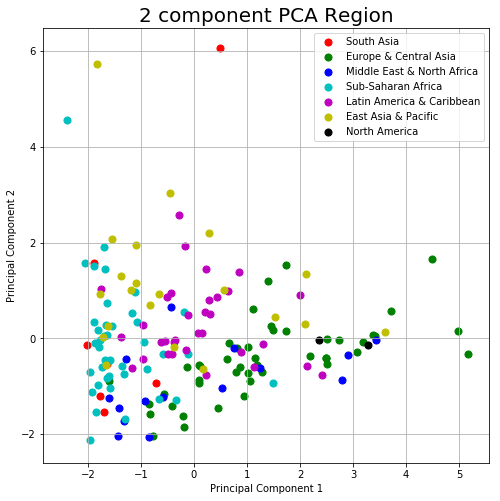

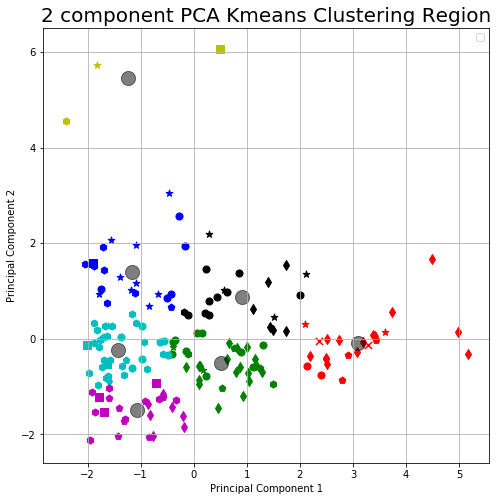

In [167]:
colors_region = ['r', 'g', 'b','c','m','y','k']
pca_plot(colors_region,socio_pca_dropped_df,"Region")

region_cluster_labels_socio, region_centers_socio = perform_kmeans(X_socio, 7)
socio_pca_dropped_df["Region_Cluster"] = region_cluster_labels_socio
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,socio_pca_dropped_df,"Region",region_centers_socio)

In [168]:
plot_plotly(socio_pca_dropped_df,"Region",region_centers_socio,7, "Socioeconomic + Foods",'')

#### Development Level

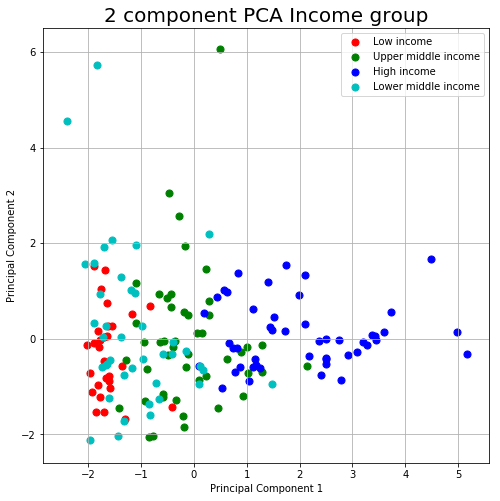

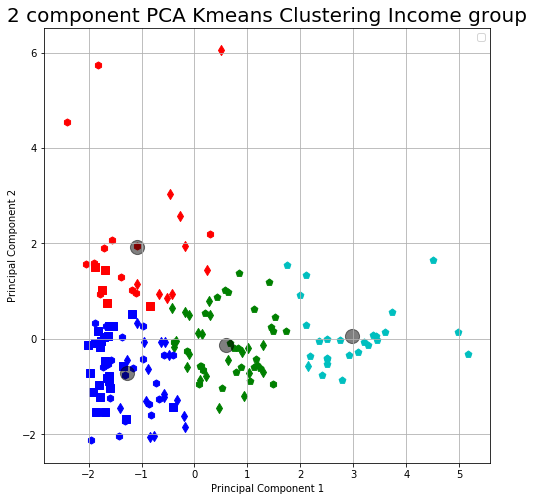

In [169]:
colors_region = ['r', 'g', 'b','c']
pca_plot(colors_region,socio_pca_dropped_df,"Income group")

income_cluster_labels_socio, income_centers_socio = perform_kmeans(X_socio, 4)
socio_pca_dropped_df["Income group_Cluster"] = income_cluster_labels_socio
mark_shapes = ['s','d','p','h']

pca_kmeans_plot(colors_region,mark_shapes,socio_pca_dropped_df,"Income group",income_centers_socio)

socio_pca_dropped_df.to_csv("datasets/results/pca_socio.csv")

In [170]:
plot_plotly(socio_pca_dropped_df,"Income group",income_centers_socio,4,"Socioeconomic + Foods",'')

### Analysis 3: PCA on protein foods + GDP + Urban/Rural ratio + permanent crops ratio 

###### Prepare the datasets

In [171]:
# http://apps.who.int/gho/data/node.main.CHILDSTUNTED?lang=en
stunting_df = pd.read_csv("datasets/NUTRITION_HA_2.csv", skiprows=1)
overweight_df = pd.read_csv("datasets/NUTRITION_WH2.csv",skiprows=1)

In [172]:
stunting_df.head()

,Country,Year,Both sexes
0,Afghanistan,2013,40.9
1,Afghanistan,2004,59.3
2,Afghanistan,1997,53.2
3,Albania,2017-2018,11.3
4,Albania,2008-2009,23.2


In [173]:
overweight_df.head()

,Country,Year,Both sexes
0,Afghanistan,2013,5.4
1,Afghanistan,2004,4.6
2,Afghanistan,1997,6.5
3,Albania,2017-2018,16.4
4,Albania,2008-2009,23.2


In [174]:
def get_nearest_year(df,name):
    """
    This function takes in a dataframe, and split the year range to half. 
    It keeps the start year. Then finds the latest year and adds it to the result dataframe. 
    """
    result_df = pd.DataFrame()
    country_list = df["Country"].unique().tolist()
    country_code_new = []
    df[[1,2]] = df['Year'].str.split('-',n=1, expand=True)
    df = df.drop(["Year",2], axis = 1)
    df = df.rename({1:"year"," Both sexes":name},axis = 1)
    df["year"] = df["year"].astype(int)
    for i in country_list:
        try:
            code = country_name_to_country_alpha3(i)
            country_code_new.append(code)
        except:
            code = i 
            country_code_new.append(code)
        result_df = result_df.append(df.loc[[df[df["Country"] == i]["year"].idxmax()]])
    return result_df,country_code_new

In [175]:
result_stunting_df,country_code_new_stunting = get_nearest_year(stunting_df,"stunting(percentage)")
result_overweight_df,country_code_new_overweight = get_nearest_year(overweight_df,"overweight(percentage)")

# get country code for both datasets for easier merging later
result_stunting_df["Code"] = country_code_new_stunting
result_overweight_df["Code"] = country_code_new_overweight

# Replace the missing ones with manully inputted country codes. 
result_stunting_df["Code"] = result_stunting_df["Code"].replace(manual_country_code_dict)
result_overweight_df["Code"] = result_overweight_df["Code"].replace(manual_country_code_dict)

In [176]:
# We merge this health dataset with the intermediate data set from previous anaylsis. 
protein_group_merged_stunting_master_df = socio_pca_df.merge(result_stunting_df,how="left", on="Code")
protein_group_merged_stunting_ow_master_df = protein_group_merged_stunting_master_df.merge(result_overweight_df,how="left", on="Code")

In [177]:
# Check the missing values here. 
print("Countries with no children health data {}".format(protein_group_merged_stunting_ow_master_df[protein_group_merged_stunting_ow_master_df["stunting(percentage)"].isna()]["Country_x"].tolist()))

Countries with no children health data ['Antigua and Barbuda', 'Austria', 'Bahamas', 'Belgium', 'Bermuda', 'Canada', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, Taiwan Province of', 'Croatia', 'Cyprus', 'Denmark', 'Dominica', 'Estonia', 'Finland', 'France', 'French Polynesia', 'Greece', 'Grenada', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'New Caledonia', 'New Zealand', 'Norway', 'Portugal', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom']


In [178]:
# We are going to drop the missing values for now. 
protein_group_merged_stunting_ow_master_df = protein_group_merged_stunting_ow_master_df.dropna(subset=['stunting(percentage)','overweight(percentage)']) 

In [179]:
# We only keep the useful columns here
socio_health_cols = socio_cols+['stunting(percentage)','overweight(percentage)']
socio_health_cols.remove(" Av 2011+2012+2013 extracted from WDI (constant 2010 US$)")
socio_health_cols.remove("Urban_Rural_ratio")
socio_health_cols.remove("Permenent_Crops_Ratio")
protein_group_merged_stunting_ow_master_df = protein_group_merged_stunting_ow_master_df[socio_health_cols + country_cols]
# protein_group_merged_stunting_ow_master_df.rename({"Income group_y":"Income group","Fish_x":"Fish","Region_y":"Region"},axis = 1,inplace = True)

In [180]:
# Overview of our dataset. 
protein_group_merged_stunting_ow_master_df.head()

,Bovine_Sheep_Pigmeat_Poultry,Cereals,Milk_Egg,Fish_x,stunting(percentage),overweight(percentage),Country,Code,Income group,Region,Continent
0,4.82,41.39,6.34,0.02,40.9,5.4,Afghanistan,AFG,Low income,South Asia,Asia
1,22.20,35.48,32.91,1.50,11.3,16.4,Albania,ALB,Upper middle income,Europe & Central Asia,Eurpoe
2,7.18,49.25,15.87,1.23,11.7,12.4,Algeria,DZA,Upper middle income,Middle East & North Africa,Africa
3,11.60,19.00,1.53,4.14,37.6,3.4,Angola,AGO,Upper middle income,Sub-Saharan Africa,Africa
5,43.03,27.19,17.95,1.95,8.2,9.9,Argentina,ARG,Upper middle income,Latin America & Caribbean,South America


###### PCA 

In [181]:
health_scaled = StandardScaler().fit_transform(protein_group_merged_stunting_ow_master_df[socio_health_cols])

In [182]:
# Merge the calculated PCA value back to our dataset. 

principalComponents_health = pca.fit_transform(health_scaled)
pc_health_1,pc_health_2 = zip(*principalComponents_health)
protein_group_merged_stunting_ow_master_df["principal component 1"] = pc_health_1
protein_group_merged_stunting_ow_master_df["principal component 2"] = pc_health_2
protein_group_merged_stunting_ow_master_df = protein_group_merged_stunting_ow_master_df.rename({"Income group_y":"Income group","Region_y":"Region"}, axis = 1)
X_health = protein_group_merged_stunting_ow_master_df[["principal component 1","principal component 2"]].values

#### Continent Level

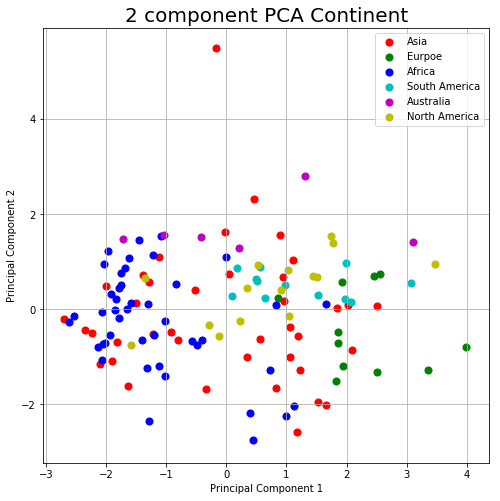

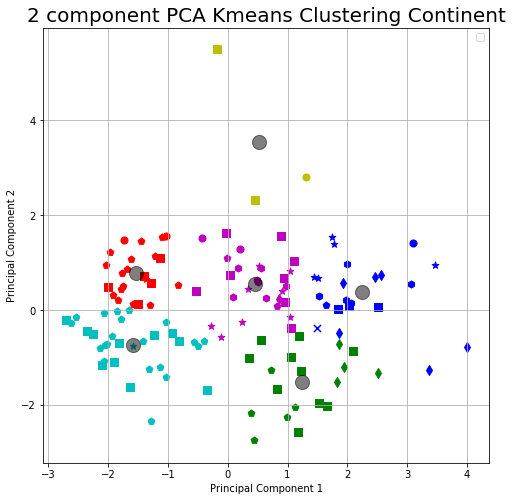

In [183]:
colors_region = ['r', 'g', 'b','c','m','y']
pca_plot(colors_region,protein_group_merged_stunting_ow_master_df,"Continent")

continent_cluster_labels_health, continent_centers_health = perform_kmeans(X_health, 6)
protein_group_merged_stunting_ow_master_df["Continent_Cluster"] = continent_cluster_labels_health
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,protein_group_merged_stunting_ow_master_df,"Continent",continent_centers_health)

In [184]:
plot_plotly(protein_group_merged_stunting_ow_master_df,"Continent",continent_centers_health,6,"Health + Foods",'')

#### Region Level 

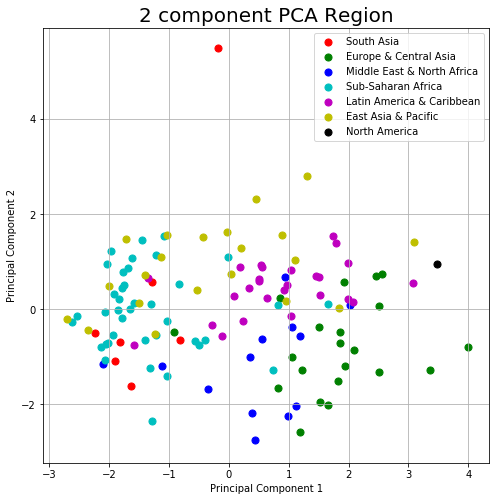

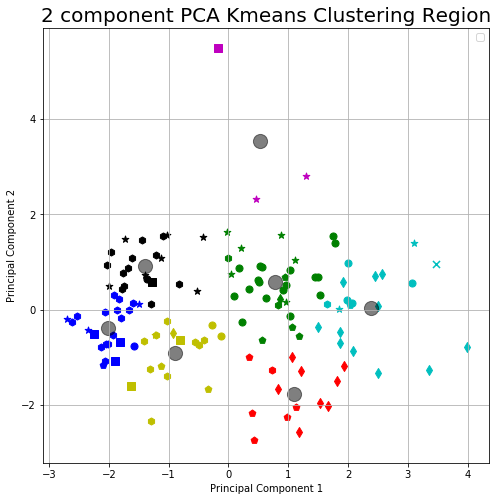

In [185]:
colors_region = ['r', 'g', 'b','c','m','y','k']
pca_plot(colors_region,protein_group_merged_stunting_ow_master_df,"Region")

region_cluster_labels_health, region_centers_health = perform_kmeans(X_health, 7)
protein_group_merged_stunting_ow_master_df["Region_Cluster"] = region_cluster_labels_health
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,protein_group_merged_stunting_ow_master_df,"Region",region_centers_health)

In [186]:
plot_plotly(protein_group_merged_stunting_ow_master_df,"Region",region_centers_health,7,"Health + Foods",'')

#### Development Level

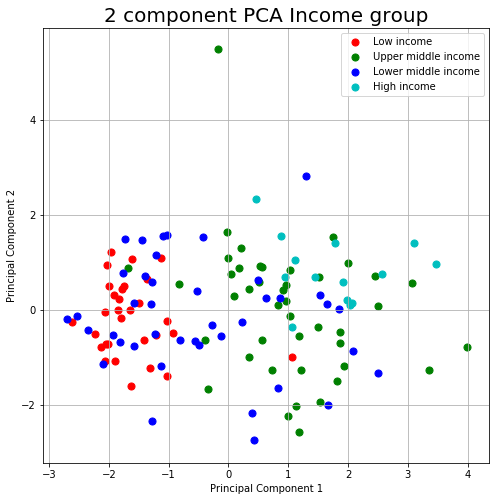

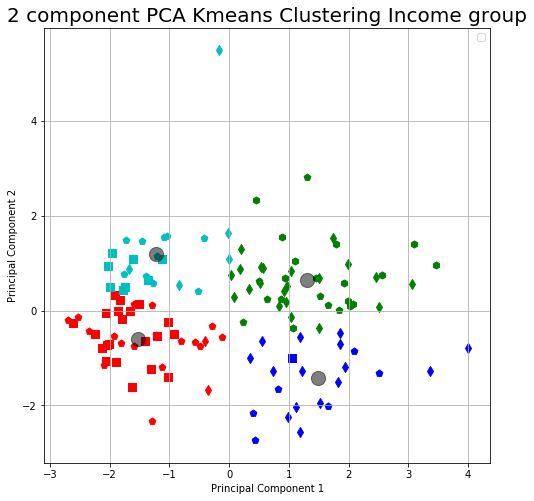

In [187]:
colors_region = ['r', 'g', 'b','c']
pca_plot(colors_region,protein_group_merged_stunting_ow_master_df,"Income group")

income_cluster_labels_health, income_centers_health = perform_kmeans(X_health, 4)
protein_group_merged_stunting_ow_master_df["Income group_Cluster"] = income_cluster_labels_health
mark_shapes = ['s','d','p','h']

pca_kmeans_plot(colors_region,mark_shapes,protein_group_merged_stunting_ow_master_df,"Income group",income_centers_health)

protein_group_merged_stunting_ow_master_df.to_csv("datasets/results/pca_health.csv")

In [188]:
plot_plotly(protein_group_merged_stunting_ow_master_df,"Income group",income_centers_health,4,"Health + Foods",'')

### Analysis 4: Different Cluster Numbers & One Spectral Clustering

#### Additional Analysis 1 with Health data. K means using 3 clusters

In [189]:
cluster_labels_1_health, centers_1_health = perform_kmeans(X_health, 3)
protein_group_merged_stunting_ow_master_df["additional_cluster_1"] = cluster_labels_1_health

In [190]:
plot_plotly(protein_group_merged_stunting_ow_master_df,"Income group",centers_1_health,3,"Health + Foods","additional_cluster_1")

####  Additional Analysis 2 with Health data. Spectral Clustering using 3 clusters

In [191]:
from sklearn.cluster import SpectralClustering

def spect_kmeans(X,cluste_num):
    clustering = SpectralClustering(cluste_num,assign_labels="discretize",random_state=0).fit(X)
    return clustering.labels_, "no center"

In [192]:
cluster_labels_2_health, centers_2_health = spect_kmeans(X_health, 3)
protein_group_merged_stunting_ow_master_df["additional_spect_cluster_2"] = cluster_labels_2_health
plot_plotly(protein_group_merged_stunting_ow_master_df,"Income group",centers_2_health,3,"Health + Foods","additional_spect_cluster_2")

#### Additional Analysis 3 with Socio data. K means Clustering using 3 clusters

In [193]:
cluster_labels_3, centers_3 = perform_kmeans(X_socio, 3)
socio_pca_dropped_df["additional_cluster_3"] = cluster_labels_3
plot_plotly(socio_pca_dropped_df,"Income group",centers_3,3,"Socioeconomic + Foods" ,"additional_cluster_3")

#### Additional Analysis 4 with Protein Foods data. K means Clustering using 3 clusters

In [194]:
cluster_labels_4, centers_4 = perform_kmeans(X, 3)
protein_group_merged_df["additional_cluster_4"] = cluster_labels_4
plot_plotly(protein_group_merged_df,"Income group",centers_4,3,"Foods","additional_cluster_4")

## Part 2

Analysis 1: Production (use the same categories as in the consumption / food balance from FAO but for production by country instead); we then want to add a measure of pasture land and arable land --- this was compiled by Cecil at CSIRO and is in the attached spreadsheet.

Analysis 2: Socio-economic data (GDP, proportion population rural, proportion of population employed in agriculture, agriculture value added % GDP, Gini coefficient, unemployment rate (ILO)) --- I believe we had dropped some of these originally because there wasn't 2011-2013 data; I think this would be a good time to pilot our weighting via nearest neighbors (i.e., if we have a 2007 as the only data point, use that; if we have a 2006 and a 2014, weight 2014 with 3/4 weight, 2006 with 1/4 weight based on their "distance" from 2012 (middle year of interest). Fabliha---we had grabbed most recent year Gini coefficients from World Bank. Some countries (e.g. Afghanistan) were missing. Is there another metric or another data source for this? 

Analysis 3: Environment (pretty much totally new --- let's grab the % renewable water for agriculture, total GHG emissions, GHG emissions from agr. (FAO), then the protected areas (terrestrial and freshwater), red list index species survival, and deforestation rate that are used in the SDG global index https://github.com/sdsna; hopefully some of those sources have older data; the Yale EPI for 2014 might also have some good data if we can't find it in the SDG index sources).


### Analysis 1
Production Level on the following products:

Barley and products
Bovine Meat
Maize and products
Mutton & Goat Meat
Pigmeat
Poultry Meat
Pulses, Other and products
Rice (Milled Equivalent)
Rye and products
Wheat and products
Eggs + (Total)
Fish, Seafood + (Total)
Milk - Excluding Butter + (Total)
Starchy Roots + (Total)

Unit is 1000 tonns. 

In [195]:
production_df = pd.read_csv("datasets/FAOSTAT_2011_2012_2013.csv")
production_df = production_df.drop(["Domain Code"
                                    ,"Domain"
                                    ,"Element"
                                    ,"Country Code"
                                   ,"Element Code"
                                   ,"Item Code"
                                   ,"Year Code"
                                   ,"Unit"
                                   ,"Flag"
                                   ,"Flag Description"],axis = 1)
production_df.head()


,Country,Item,Year,Value
0,Afghanistan,Wheat and products,2011,3388
1,Afghanistan,Wheat and products,2012,5050
2,Afghanistan,Wheat and products,2013,5169
3,Afghanistan,Rice (Milled Equivalent),2011,448
4,Afghanistan,Rice (Milled Equivalent),2012,334


In [196]:
# Check if there is a country with missing value 
production_df[production_df.isnull().any(axis=1)]

,Country,Item,Year,Value


In [213]:
production_df["Value"].astype(int,inplace= True)
production_df["Year"].astype(int,inplace= True)
production_mean_df = production_df.pivot_table(index=['Country','Item'], 
                                      values=['Value'],
                                      aggfunc='mean', 
                                      fill_value=0) 

production_mean_df = production_mean_df.reset_index()

# Missing Values are filled with 0 
production_pivoted_df = production_mean_df.pivot_table(index='Country', columns = 'Item', values = 'Value', 
                                      fill_value=0) 
production_pivoted_df =production_pivoted_df.reset_index()
production_pivoted_df.head(5)

Item,Country,Barley and products,Bovine Meat,Eggs,"Fish, Seafood",Maize and products,Milk - Excluding Butter,Mutton & Goat Meat,Pigmeat,Poultry Meat,"Pulses, Other and products",Rice (Milled Equivalent),Rye and products,Starchy Roots,Wheat and products
0,Afghanistan,441.333333,137.000000,17.666667,2.000000,307.333333,1807.666667,155.333333,0.000000,25.666667,65.333333,374.666667,0.0,246.000000,4535.666667
1,Albania,7.666667,68.000000,43.666667,7.000000,366.000000,1112.333333,46.000000,17.333333,16.666667,3.000000,0.000000,3.0,233.333333,295.666667
2,Algeria,1398.333333,133.666667,312.000000,106.666667,1.333333,2923.333333,282.333333,0.000000,284.666667,76.333333,0.000000,0.0,4336.333333,3095.333333
3,Angola,0.000000,102.333333,5.000000,273.000000,1088.333333,185.666667,22.333333,85.333333,26.000000,0.000000,18.000000,0.0,15479.000000,4.000000
4,Antigua and Barbuda,0.000000,1.000000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000


In [214]:
# Same as above we get a ISO3 Code for it. 

countries = production_pivoted_df["Country"]
continents,country_codes = convert_continents(countries)
    

Bolivia (Plurinational State of)
China, Hong Kong SAR
China, Macao SAR
China, Taiwan Province of
China, mainland
Eswatini
Iran (Islamic Republic of)
North Macedonia
Republic of Korea
Sudan (former)
Timor-Leste
Venezuela (Bolivarian Republic of)


In [216]:
production_pivoted_df["Code"] = country_codes
production_pivoted_df["Continent"] = continents

production_pivoted_df["Code"]  = production_pivoted_df["Code"].replace(manual_country_code_dict)
production_pivoted_df["Continent"]  = production_pivoted_df["Continent"].replace(manual_continent_dict)

production_pivoted_df.head()

production_pivoted_df.to_csv('datasets/results/production_avg_2011_2013.csv')

In [200]:
# Read in dataset on pasture land and arable land and merge 
# Deleted two China rows. Can't tell what those are
# Deleted Congo No data!
pasture_arable_df = pd.read_excel("datasets/pasture_crops.xlsx")
pasture_arable_df.head()

,ISO3,crop_area_per_ISO3_hectare,pasture_area_per_ISO3_hectare,Crop as Prop total,Pasture as prop total area,Ratio crop:pasture,Country,Total area of the country (excl. coastal waters),Pasture as prop total area.1,Unnamed: 9,Unnamed: 10
0,Afghanistan,8.066484e+06,2.724171e+07,0.123556,0.417267,0.296108,Afghanistan,65286.0,0.417267,NaN,NaN
1,Albania,6.423613e+05,3.976054e+05,0.223430,0.138298,1.615575,Albania,2875.0,0.138298,NaN,NaN
2,Algeria,5.582107e+06,2.560169e+07,0.023437,0.107492,0.218037,Algeria,238174.0,0.107492,NaN,NaN
3,Angola,3.357759e+06,5.172900e+07,0.026933,0.414927,0.064911,Angola,124670.0,0.414927,NaN,NaN
4,NaN,NaN,NaN,0.000000,0.000000,NaN,Antigua and Barbuda,44.0,0.000000,NaN,NaN


In [201]:
pasture_arable_df = pasture_arable_df[['Country','Crop as Prop total','Pasture as prop total area']]
pasture_arable_df.head()

,Country,Crop as Prop total,Pasture as prop total area
0,Afghanistan,0.123556,0.417267
1,Albania,0.223430,0.138298
2,Algeria,0.023437,0.107492
3,Angola,0.026933,0.414927
4,Antigua and Barbuda,0.000000,0.000000


In [202]:

countries = pasture_arable_df["Country"]
continents,country_codes = convert_continents(countries)

Bolivia (Plurinational State of)
Cote d'Ivoire
Iran (Islamic Republic of)
Republic of Korea
Eswatini
North Macedonia
Timor-Leste
Venezuela (Bolivarian Republic of)


In [203]:
pasture_arable_df["Code"] = country_codes
pasture_arable_df["Continent"] = continents

pasture_arable_df["Code"]  = pasture_arable_df["Code"].replace(manual_country_code_dict)
pasture_arable_df["Continent"]  = pasture_arable_df["Continent"].replace(manual_continent_dict)

In [204]:
pasture_arable_df.head()

,Country,Crop as Prop total,Pasture as prop total area,Code,Continent
0,Afghanistan,0.123556,0.417267,AFG,Asia
1,Albania,0.223430,0.138298,ALB,Eurpoe
2,Algeria,0.023437,0.107492,DZA,Africa
3,Angola,0.026933,0.414927,AGO,Africa
4,Antigua and Barbuda,0.000000,0.000000,ATG,North America


In [205]:

cols_to_use = pasture_arable_df.columns.difference(production_pivoted_df.columns).tolist() + ["Code"]
production_merged_df = production_pivoted_df.merge(pasture_arable_df[cols_to_use],how = "inner", on = "Code")

In [206]:
# Stats after inner merging 
print("Production dataframe had {} rows. Pasture dataframe had {} rows. Merged Dataframe has {} rows.".format(production_pivoted_df.shape[0]
                                                                                                              ,pasture_arable_df.shape[0]
                                                                                                             ,production_merged_df.shape[0]))

production_merged_df.head()

Production dataframe had 176 rows. Pasture dataframe had 170 rows. Merged Dataframe has 172 rows.


,Country,Barley and products,Bovine Meat,Eggs,"Fish, Seafood",Maize and products,Milk - Excluding Butter,Mutton & Goat Meat,Pigmeat,Poultry Meat,"Pulses, Other and products",Rice (Milled Equivalent),Rye and products,Starchy Roots,Wheat and products,Code,Continent,Crop as Prop total,Pasture as prop total area
0,Afghanistan,441.333333,137.000000,17.666667,2.000000,307.333333,1807.666667,155.333333,0.000000,25.666667,65.333333,374.666667,0.0,246.000000,4535.666667,AFG,Asia,0.123556,0.417267
1,Albania,7.666667,68.000000,43.666667,7.000000,366.000000,1112.333333,46.000000,17.333333,16.666667,3.000000,0.000000,3.0,233.333333,295.666667,ALB,Eurpoe,0.223430,0.138298
2,Algeria,1398.333333,133.666667,312.000000,106.666667,1.333333,2923.333333,282.333333,0.000000,284.666667,76.333333,0.000000,0.0,4336.333333,3095.333333,DZA,Africa,0.023437,0.107492
3,Angola,0.000000,102.333333,5.000000,273.000000,1088.333333,185.666667,22.333333,85.333333,26.000000,0.000000,18.000000,0.0,15479.000000,4.000000,AGO,Africa,0.026933,0.414927
4,Antigua and Barbuda,0.000000,1.000000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,ATG,North America,0.000000,0.000000


In [207]:
col_list = production_merged_df.columns.tolist()
production_list = col_list[1:15]
crop_pasture_list = col_list[17:19]
pca_production_list = production_list + crop_pasture_list
pca_production_list

['Barley and products',
 'Bovine Meat',
 'Eggs',
 'Fish, Seafood',
 'Maize and products',
 'Milk - Excluding Butter',
 'Mutton & Goat Meat',
 'Pigmeat',
 'Poultry Meat',
 'Pulses, Other and products',
 'Rice (Milled Equivalent)',
 'Rye and products',
 'Starchy Roots',
 'Wheat and products',
 'Crop as Prop total',
 'Pasture as prop total area']

In [208]:

production_scaled = StandardScaler().fit_transform(production_merged_df[pca_production_list])

principalComponents_production= pca.fit_transform(production_scaled)

pc_production_1,pc_production_2 = zip(*principalComponents_production)
production_merged_df["principal component 1"] = pc_production_1
production_merged_df["principal component 2"] = pc_production_2


X_production = production_merged_df[["principal component 1","principal component 2"]].values
production_merged_df.head()

,Country,Barley and products,Bovine Meat,Eggs,"Fish, Seafood",Maize and products,Milk - Excluding Butter,Mutton & Goat Meat,Pigmeat,Poultry Meat,...,Rice (Milled Equivalent),Rye and products,Starchy Roots,Wheat and products,Code,Continent,Crop as Prop total,Pasture as prop total area,principal component 1,principal component 2
0,Afghanistan,441.333333,137.000000,17.666667,2.000000,307.333333,1807.666667,155.333333,0.000000,25.666667,...,374.666667,0.0,246.000000,4535.666667,AFG,Asia,0.123556,0.417267,-0.542152,-0.328127
1,Albania,7.666667,68.000000,43.666667,7.000000,366.000000,1112.333333,46.000000,17.333333,16.666667,...,0.000000,3.0,233.333333,295.666667,ALB,Eurpoe,0.223430,0.138298,-0.756448,-0.112562
2,Algeria,1398.333333,133.666667,312.000000,106.666667,1.333333,2923.333333,282.333333,0.000000,284.666667,...,0.000000,0.0,4336.333333,3095.333333,DZA,Africa,0.023437,0.107492,-0.379616,-0.298442
3,Angola,0.000000,102.333333,5.000000,273.000000,1088.333333,185.666667,22.333333,85.333333,26.000000,...,18.000000,0.0,15479.000000,4.000000,AGO,Africa,0.026933,0.414927,-0.574035,-0.811164
4,Antigua and Barbuda,0.000000,1.000000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,ATG,North America,0.000000,0.000000,-0.933964,-0.634058


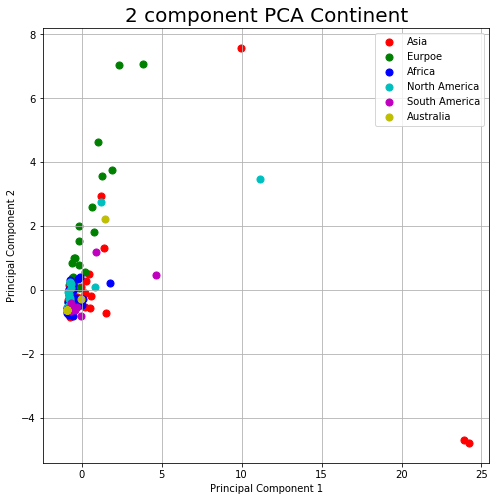

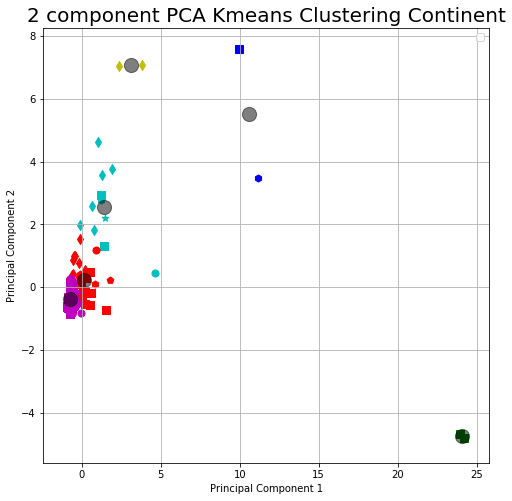

In [209]:
colors_region = ['r', 'g', 'b','c','m','y']
pca_plot(colors_region,production_merged_df,"Continent")

continent_cluster_labels_production, continent_centers_production = perform_kmeans(X_production, 6)
production_merged_df["Continent_Cluster"] = continent_cluster_labels_production
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,production_merged_df,"Continent",continent_centers_production)

In [210]:
# Based on the graph, This is not a very good analysis. We are going to try to group the food production. 
production_merged_df['Bovine_Sheep_Pigmeat_Poultry'] = production_merged_df['Bovine Meat']\
                                                        +production_merged_df['Mutton & Goat Meat']\
                                                        +production_merged_df['Pigmeat']\
                                                        +production_merged_df['Poultry Meat']

production_merged_df['Milk_Egg'] = production_merged_df['Milk - Excluding Butter']+production_merged_df['Eggs']

production_merged_df['Cereals'] = production_merged_df['Maize and products']+production_merged_df['Barley and products']\
                                        +production_merged_df['Pulses, Other and products']+production_merged_df['Rice (Milled Equivalent)']\
                                    +production_merged_df['Rye and products']+production_merged_df['Starchy Roots']+production_merged_df['Wheat and products']

production_list_minus_seafood = production_list.copy()
print(production_list_minus_seafood)
production_list_minus_seafood.remove('Fish, Seafood')
production_merged_df = production_merged_df.drop(production_list_minus_seafood,axis=1)

production_merged_df.head()

['Barley and products', 'Bovine Meat', 'Eggs', 'Fish, Seafood', 'Maize and products', 'Milk - Excluding Butter', 'Mutton & Goat Meat', 'Pigmeat', 'Poultry Meat', 'Pulses, Other and products', 'Rice (Milled Equivalent)', 'Rye and products', 'Starchy Roots', 'Wheat and products']


,Country,"Fish, Seafood",Code,Continent,Crop as Prop total,Pasture as prop total area,principal component 1,principal component 2,Continent_Cluster,Bovine_Sheep_Pigmeat_Poultry,Milk_Egg,Cereals
0,Afghanistan,2.000000,AFG,Asia,0.123556,0.417267,-0.542152,-0.328127,4,318.000000,1825.333333,5970.333333
1,Albania,7.000000,ALB,Eurpoe,0.223430,0.138298,-0.756448,-0.112562,4,148.000000,1156.000000,908.666667
2,Algeria,106.666667,DZA,Africa,0.023437,0.107492,-0.379616,-0.298442,4,700.666667,3235.333333,8907.666667
3,Angola,273.000000,AGO,Africa,0.026933,0.414927,-0.574035,-0.811164,4,236.000000,190.666667,16589.333333
4,Antigua and Barbuda,2.000000,ATG,North America,0.000000,0.000000,-0.933964,-0.634058,4,1.000000,6.000000,1.000000


In [211]:
# Calculate new pca 
production_grouped_scaled = StandardScaler().fit_transform(production_merged_df[["Fish, Seafood","Bovine_Sheep_Pigmeat_Poultry"
                                                                                ,"Milk_Egg","Cereals","Crop as Prop total"
                                                                                ,"Pasture as prop total area"]])

principalComponents_production_grouped= pca.fit_transform(production_grouped_scaled)

pc_production_grouped_1,pc_production_grouped_2 = zip(*principalComponents_production)
production_merged_df["principal component 1"] = pc_production_grouped_1
production_merged_df["principal component 2"] = pc_production_grouped_2


X_production_grouped = production_merged_df[["principal component 1","principal component 2"]].values
production_merged_df.head()


,Country,"Fish, Seafood",Code,Continent,Crop as Prop total,Pasture as prop total area,principal component 1,principal component 2,Continent_Cluster,Bovine_Sheep_Pigmeat_Poultry,Milk_Egg,Cereals
0,Afghanistan,2.000000,AFG,Asia,0.123556,0.417267,-0.542152,-0.328127,4,318.000000,1825.333333,5970.333333
1,Albania,7.000000,ALB,Eurpoe,0.223430,0.138298,-0.756448,-0.112562,4,148.000000,1156.000000,908.666667
2,Algeria,106.666667,DZA,Africa,0.023437,0.107492,-0.379616,-0.298442,4,700.666667,3235.333333,8907.666667
3,Angola,273.000000,AGO,Africa,0.026933,0.414927,-0.574035,-0.811164,4,236.000000,190.666667,16589.333333
4,Antigua and Barbuda,2.000000,ATG,North America,0.000000,0.000000,-0.933964,-0.634058,4,1.000000,6.000000,1.000000


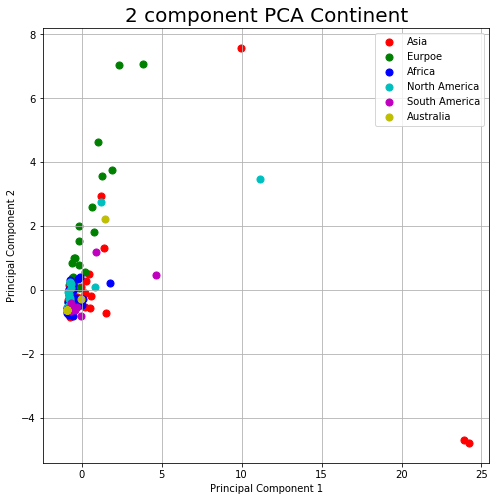

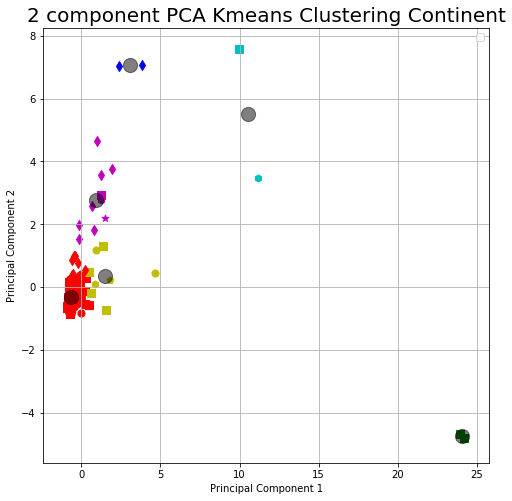

In [212]:
colors_region = ['r', 'g', 'b','c','m','y']
pca_plot(colors_region,production_merged_df,"Continent")

continent_cluster_labels_production_grouped, continent_centers_production_grouped = perform_kmeans(X_production, 6)
production_merged_df["Continent_Cluster"] = continent_cluster_labels_production_grouped
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,production_merged_df,"Continent",continent_centers_production_grouped)

In [135]:
plot_plotly(production_merged_df,"Continent",continent_centers_production_grouped,6,"Production",'')
# Overall this is not a so interesting analysis, since all the points are mostly clusted together

### Analysis 2
Analysis 2: Socio-economic data (GDP, proportion population rural, proportion of population employed in agriculture, agriculture value added % GDP, Gini coefficient, unemployment rate (ILO)) --- I believe we had dropped some of these originally because there wasn't 2011-2013 data; I think this would be a good time to pilot our weighting via nearesst neighbors (i.e., if we have a 2007 as the only data point, use that; if we have a 2006 and a 2014, weight 2014 with 3/4 weight, 2006 with 1/4 weight based on their "distance" from 2012 (middle year of interest).

Dataset Sources:  unemployment rate from https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS (modeled ILO), agriculture gdp(fishing and forestry):https://data.worldbank.org/indicator/NV.AGR.TOTL.ZS (percentage of GDP)
                  GDP from https://data.worldbank.org/indicator/NY.GDP.MKTP.CD (Constant 2010 US dollars), Employment in agriculture: https://data.worldbank.org/indicator/SL.AGR.EMPL.ZS (modeled estimate), GINI from https://data.worldbank.org/indicator/SI.POV.GINI?view=map (World Bank Estimate Too much missing value. Finding other replacements)
                    

In [138]:
# Construct our dataframe that contains all the information above.
# Read in datasets first 
unemployment_rate_df = pd.read_csv("datasets/part 2 analysis 2/modeled_ILO_estimate.csv") # DONE 
agri_gdp_df = pd.read_csv("datasets/part 2 analysis 2/agri_forestry_fish_gdp.csv") # DONE
agri_employment_df = pd.read_csv("datasets/part 2 analysis 2/agri_employment.csv") # DONE
gini_df = pd.read_csv("datasets/part 2 analysis 2/gini_co.csv") # TODO
gdp_df = pd.read_csv("datasets/part 2 analysis 2/gdp_constant_2010.csv") # DONE




In [ ]:
def calc_weighted(df,col_name):
    df[col_name] = pd.Series()
    for index, row in df.iterrows():
        if row[2010] is not None and row[2011] is not None and row[2012] is not None:
            row[col_name] = (row[2010]+row[2011]+row[2012])/3
        elif row[2010] is None and row[2011] is not None and row[2012] is not None:
            
            
            
    

### Analysis 3 
Analysis 3: Environment (pretty much totally new --- let's grab the % renewable water for agriculture, total GHG emissions, GHG emissions from agr. (FAO), then the protected areas (terrestrial and freshwater), red list index species survival, and deforestation rate that are used in the SDG global index https://github.com/sdsna; hopefully some of those sources have older data; the Yale EPI for 2014 might also have some good data if we can't find it in the SDG index sources).